In [1]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [2]:
#pip install yfinance
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import yfinance as yf
#from yahoofinancials import YahooFinancials

In [3]:
# also
# yf.download(tickers = symbol, start = start, end = end)
#symbol = 'AAPL'
symbol = ["ANB.MX", "BIMBOA.MX", "BOLSAA.MX", "GENIUS21.MX", "HERDEZ.MX", "IVVPESOISHRS.MX", "WALMEX.MX"]
aapl_df = yf.download(tickers=symbol)
aapl_df.head()

[*********************100%%**********************]  7 of 7 completed


Adj Close                                            \
              ANB.MX BIMBOA.MX BOLSAA.MX GENIUS21.MX HERDEZ.MX   
Date                                                             
2000-01-03       NaN  3.922457       NaN         NaN       NaN   
2000-01-04       NaN  3.746825       NaN         NaN       NaN   
2000-01-05       NaN  3.805369       NaN         NaN       NaN   
2000-01-06       NaN  3.653154       NaN         NaN       NaN   
2000-01-07       NaN  3.707796       NaN         NaN       NaN   

                                      Close                      ...  \
           IVVPESOISHRS.MX WALMEX.MX ANB.MX BIMBOA.MX BOLSAA.MX  ...   
Date                                                             ...   
2000-01-03             NaN       NaN    NaN     5.025       NaN  ...   
2000-01-04             NaN       NaN    NaN     4.800       NaN  ...   
2000-01-05             NaN       NaN    NaN     4.875       NaN  ...   
2000-01-06             NaN       NaN    NaN     4.680       NaN  ...   
2000-01-07             NaN       NaN    NaN     4.750       NaN  ...   

                Open                           Volume                      \
           HERDEZ.MX IVVPESOISHRS.MX WALMEX.MX ANB.MX BIMBOA.MX BOLSAA.MX   
Date                                                                        
2000-01-03       NaN             NaN       NaN    NaN    984000       NaN   
2000-01-04       NaN             NaN       NaN    NaN   1396000       NaN   
2000-01-05       NaN             NaN       NaN    NaN   1272000       NaN   
2000-01-06       NaN             NaN       NaN    NaN   1744000       NaN   
2000-01-07       NaN             NaN       NaN    NaN   8824000       NaN   

                                                            
           GENIUS21.MX HERDEZ.MX IVVPESOISHRS.MX WALMEX.MX  
Date                                                        
2000-01-03         NaN       NaN             NaN       NaN  
2000-01-04         NaN       NaN             NaN       NaN  
2000-01-05         NaN       NaN             NaN       NaN  
2000-01-06         NaN       NaN             NaN       NaN  
2000-01-07         NaN       NaN             NaN       NaN  

[5 rows x 42 columns]

In [4]:
# check we don't have nulls
aapl_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6130 entries, 2000-01-03 to 2024-02-19
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   (Adj Close, ANB.MX)           2545 non-null   float64
 1   (Adj Close, BIMBOA.MX)        6130 non-null   float64
 2   (Adj Close, BOLSAA.MX)        3939 non-null   float64
 3   (Adj Close, GENIUS21.MX)      737 non-null    float64
 4   (Adj Close, HERDEZ.MX)        5470 non-null   float64
 5   (Adj Close, IVVPESOISHRS.MX)  2277 non-null   float64
 6   (Adj Close, WALMEX.MX)        5348 non-null   float64
 7   (Close, ANB.MX)               2545 non-null   float64
 8   (Close, BIMBOA.MX)            6130 non-null   float64
 9   (Close, BOLSAA.MX)            3939 non-null   float64
 10  (Close, GENIUS21.MX)          737 non-null    float64
 11  (Close, HERDEZ.MX)            5470 non-null   float64
 12  (Close, IVVPESOISHRS.MX)      2277 non-null 

In [11]:
# filter
#aapl_df.loc[:, ('Close', slice(None))]
aapl_df.filter(like="ANB").filter(regex="(Close|High)")

,Adj Close,Close,High
,ANB.MX,ANB.MX,ANB.MX
Date,,,
2000-01-03,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
...,...,...,...
2024-02-13,1050.00000,1050.00000,1050.00000
2024-02-14,1059.98999,1059.98999,1059.98999


<AxesSubplot:title={'center':'Apple historic'}, xlabel='Date'>

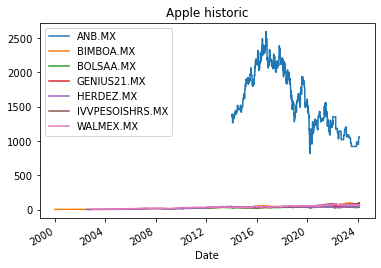

In [12]:
# pip install matplotlib
import matplotlib.pyplot as plt # Visualization
aapl_df['Close'].plot(title='Apple historic')

In [ ]:
aapl_df_2022 = aapl_df.loc['2022-01-01' : '2022-12-31']
aapl_df_2022.head()

In [ ]:
aapl_df_2022['Close'].plot(title='Apple historic 2022')

In [ ]:
aapl_df_2023 = aapl_df.loc['2023-01-01' : '2023-12-31']
aapl_df_2023['Close'].plot(title='Apple historic 2023')

In [ ]:
aapl_df_2020_2023 = aapl_df.loc['2020-01-01' : '2023-12-31']
aapl_df_2020_2023['Close'].plot(title='Apple historic 2020-2023')

In [ ]:
# https://coderzcolumn.com/tutorials/data-science/candlestick-chart-in-python-mplfinance-plotly-bokeh#2
# pip install plotly
# pip install --upgrade nbformat
import plotly.graph_objects as go
from datetime import datetime

df = aapl_df_2020_2023

fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

In [ ]:
# with SMA and no EMA index
candlestick = go.Candlestick(
                            x=df.index,
                            open=df['Open'],
                            high=df['High'],
                            low=df['Low'],
                            close=df['Close'],
                            showlegend=False,
                            increasing_line_color= 'blue', decreasing_line_color= 'orange',
                            )

sma = go.Scatter(x=df.index,
                 y=df["sma"],
                 yaxis="y1",
                 name="SMA"
                )
#ema = go.Scatter(x=df.index,
#                 y=df["EMA"],
#                 name="EMA"
#                )

#fig = go.Figure(data=[candlestick, sma, ema])
fig = go.Figure(data=[candlestick, sma])

fig.update_layout(
    width=1800, height=1600,
    title="Apple, Jan, 2020 to Dec, 2023",
    yaxis_title='AAPL Stock',
)

fig.show()

In [ ]:
aapl_df_2020_2023 = df
aapl_df_2023_jan_dec = aapl_df_2020_2023.loc['2023-01-01' : '2023-12-31']
aapl_df_2023_jan_dec.head()
df = aapl_df_2023_jan_dec

# with SMA and no EMA index
candlestick = go.Candlestick(
                            x=df.index,
                            open=df['Open'],
                            high=df['High'],
                            low=df['Low'],
                            close=df['Close'],
                            showlegend=False,
                            increasing_line_color= 'blue', decreasing_line_color= 'orange',
                            )

sma = go.Scatter(x=df.index,
                 y=df["SMA"],
                 yaxis="y1",
                 name="SMA"
                )
#ema = go.Scatter(x=df.index,
#                 y=df["EMA"],
#                 name="EMA"
#                )

#fig = go.Figure(data=[candlestick, sma, ema])
fig = go.Figure(data=[candlestick, sma])

fig.update_layout(
    width=1800, height=1600,
    title="Apple, Jan, 2020 to Dec, 2023",
    yaxis_title='AAPL Stock',
)

fig.show()

In [ ]:
def plot_candle_sma(dini, dend, df):
    df = df.loc[dini.strftime("%Y-%m-%d") : dend.strftime("%Y-%m-%d")]
    # with SMA and no EMA index
    candlestick = go.Candlestick(
                                x=df.index,
                                open=df['Open'],
                                high=df['High'],
                                low=df['Low'],
                                close=df['Close'],
                                showlegend=False,
                                increasing_line_color= 'blue', decreasing_line_color= 'orange',
                                )

    sma = go.Scatter(x=df.index,
                    y=df["SMA"],
                    yaxis="y1",
                    name="SMA"
                    )
    #ema = go.Scatter(x=df.index,
    #                 y=df["EMA"],
    #                 name="EMA"
    #                )

    #fig = go.Figure(data=[candlestick, sma, ema])
    fig = go.Figure(data=[candlestick, sma])

    fig.update_layout(
        width=1800, height=1600,
        title="Apple, Jan, 2020 to Dec, 2023",
        yaxis_title='AAPL Stock',
    )

    fig.show()

date_end = datetime.now()
date_start = datetime(2023, 9, 1)

print(date_end.strftime("%Y-%m-%d"), date_start.strftime("%Y-%m-%d"))
plot_candle_sma(date_start, date_end, aapl_df_2023_jan_dec)


In [ ]:
# my portfolio
# yf.download(tickers = symbol, start = start, end = end)
symbol = ["GENIUS21.MX", "BIMBOA.MX", "HERDEZ.MX", "BOLSAA.MX", "IVVPESOISHRS.MX", "WALMEX.MX"]
start = "2023-01-02" 
end = datetime.now().strftime("%Y-%m-%d")

portfolio_df = yf.download(tickers=symbol, start = start, end = end)
portfolio_df.head()
portfolio_df.info()

In [ ]:
portfolio_df.to_csv("stocks_portfolio.csv")

In [ ]:
BOLSA_df = portfolio_df.Close["BOLSAA.MX"]
BOLSA_df.info()
#BOLSA_df.head()

In [ ]:
BOLSA_df.head()

In [ ]:
BOLSA_df.plot()
plt.show()

In [ ]:
# interactive plots
import cufflinks as cf

In [ ]:
cf.set_config_file(offline = True)
BOLSA_df.iplot()

In [ ]:
# now for all dataframe with Close price
portfolio_df.Close.iplot()

In [ ]:
ivvpesoishrs = portfolio_df.swaplevel(axis = 1)["IVVPESOISHRS.MX"].copy()
ivvpesoishrs.head()

In [ ]:
# ivvpesoishrs.loc["2017-05"].iplot(kind= "candle")
ivvpesoishrs.loc["05-2023"].iplot(kind= "candle", 
                                  colorscale= "pubugn", 
                                  title= "IVVPESOISHRS.MX", 
                                  xTitle= "Time", 
                                  yTitle= "Stock Price")


In [ ]:
# same data but with another granullarity (weekly)
ivvpesoishrs = portfolio_df.swaplevel(axis = 1)["IVVPESOISHRS.MX"].copy()
weekly = ivvpesoishrs.resample("W-Fri").agg({"Open":"first",
                                   "High":"max",
                                   "Low":"min",
                                   "Close":"last"
                                  })
weekly.head()

In [ ]:
weekly.loc["5-2023":].iplot(kind= "candle")

In [ ]:
# adding more technical stuff
ivvpesoishrs.loc["09-2023":].iplot(kind= "candle", 
                                  colorscale= "pubugn", 
                                  title= "IVVPESOISHRS.MX", 
                                  xTitle= "Time", 
                                  yTitle= "Stock Price")

In [ ]:
# adding more technical stuff
qf = cf.QuantFig(df = ivvpesoishrs.loc["09-2023":])
type(qf)

qf.iplot(title= "IVVPESOISHRS.MX", name = "MX ETFs")

In [ ]:
qf = cf.QuantFig(df = ivvpesoishrs.loc["09-2023":])
qf.add_volume(colorchange=False)
qf.iplot(title= "IVVPESOISHRS.MX", name = "MX ETFs")

In [ ]:
qf = cf.QuantFig(df = ivvpesoishrs.loc["09-2023":])
qf.add_sma(periods=20)
qf.add_sma(periods=100)
qf.iplot(title= "IVVPESOISHRS.MX", name = "MX ETFs")

In [ ]:
qf = cf.QuantFig(df = ivvpesoishrs.loc["09-2023":])
qf.add_ema(periods=20)
qf.add_ema(periods=100)
qf.iplot(title= "IVVPESOISHRS.MX", name = "MX ETFs")

In [ ]:
qf = cf.QuantFig(df = ivvpesoishrs.loc["09-2023":])
qf.add_ema(periods=50)
qf.add_sma(periods=50)
qf.iplot(title= "IVVPESOISHRS.MX", name = "MX ETFs")